# ENTREGABLE 1

INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [63]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
# Lectura
# from google.colab import drive
# drive.mount('/gdrive')
ruta = "C:\\Users\\josan\\Documents\\GitHub\\EDEM_MDA2324\\Alumnos\\ES\\Josan_Rodrigo_Cortes\\Machine_learning\\EntregablesHechos\\dataset_banco (2).csv"
data= pd.read_csv(ruta,delimiter=',')

In [65]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [66]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [67]:
data.isna().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In [68]:
data=data.dropna()

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [69]:
for columna in data.columns:
    if data[columna].dtype == 'object': 
        valores_unicos = np.sort(data[columna].unique())
        num_valores_unicos = data[columna].nunique()
        print(f'Valores unicos para la columna {columna}: {valores_unicos}')

Valores unicos para la columna job: ['MANAGEMENT' 'Management' 'Retired' 'Self-employed' 'Services' 'admin.'
 'administrative' 'blue-collar' 'entrepreneur' 'housemaid' 'management'
 'retired' 'self-employed' 'services' 'student' 'technician' 'unemployed'
 'unknown']
Valores unicos para la columna marital: ['DIVORCED' 'Single' 'div.' 'divorced' 'married' 'single']
Valores unicos para la columna education: ['Primary' 'SECONDARY' 'Secondary' 'Tertiary' 'UNK' 'primary' 'sec.'
 'secondary' 'tertiary' 'unknown']
Valores unicos para la columna default: ['no' 'yes']
Valores unicos para la columna housing: ['no' 'yes']
Valores unicos para la columna loan: ['NO' 'No' 'YES' 'Yes' 'no' 'yes']
Valores unicos para la columna contact: ['cellular' 'mobile' 'phone' 'telephone' 'unknown']
Valores unicos para la columna month: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Valores unicos para la columna poutcome: ['Success' 'UNK' 'failure' 'other' 'success' 'unknown']
Valores u

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [70]:
duplicates = data.duplicated().sum()
print(f'Numero de filas repetidas: {duplicates}')

Numero de filas repetidas: 4


In [76]:
data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,telephone,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,telephone,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,telephone,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


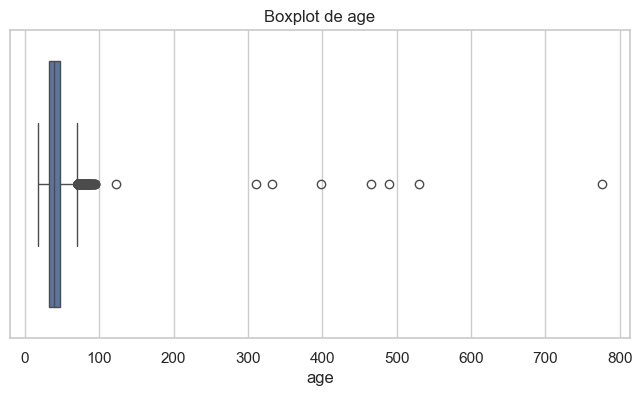

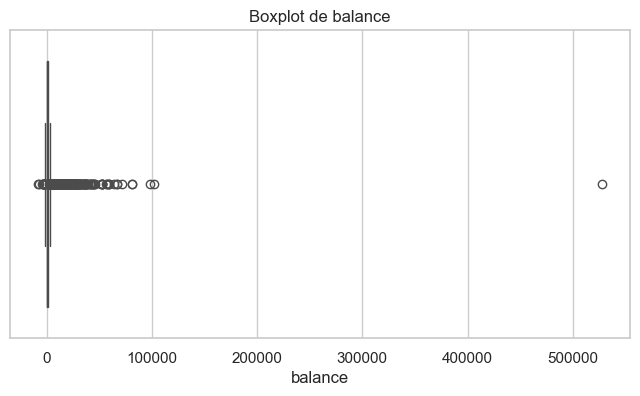

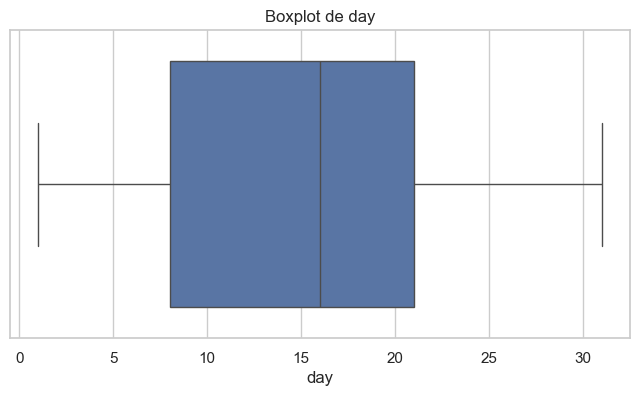

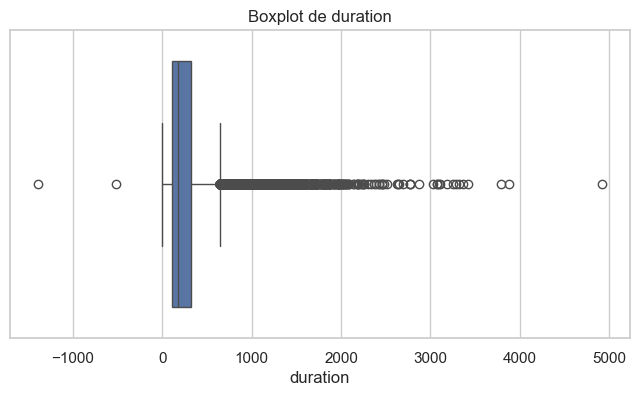

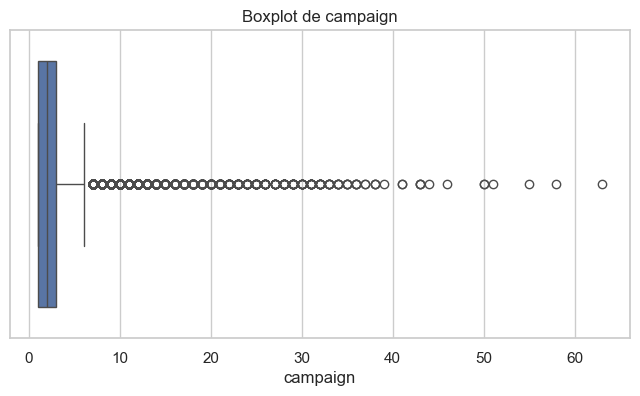

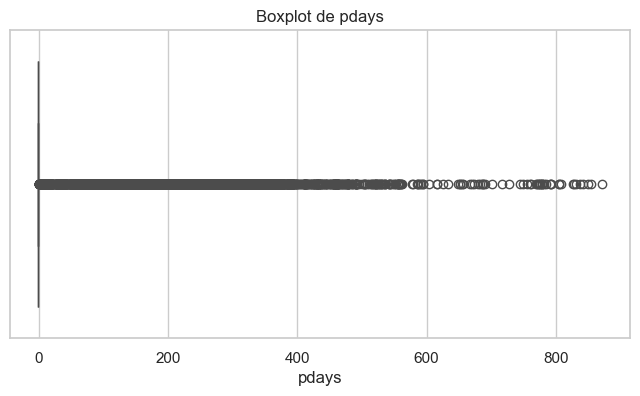

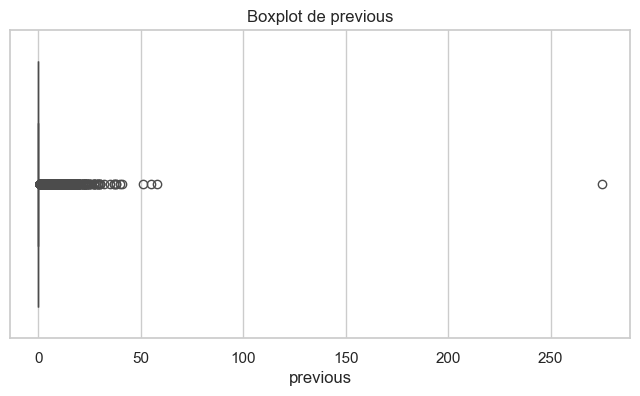

In [78]:
# Configuración para mejorar la apariencia de los gráficos
sns.set(style="whitegrid")

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot de {column}')
        plt.show()

In [79]:
# Convertimos los valores de "age">100 a nan
data.loc[data['age'] > 100, 'age'] = np.nan

# Convertimos los valores de "duration"<0 a nan
data.loc[data['duration'] < 0, 'duration'] = np.nan

##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [80]:
# Para la columna job:
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
managmen_replace={'Management':'management','MANAGEMENT':'management'}
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
data['job'] = data['job'].replace(managmen_replace, regex=False)
data['job'] = data['job'].str.replace('Self-employed', 'self-employed', regex=False)
data['job'] = data['job'].str.replace('Services', 'services', regex=False)
data['job'] = data['job'].str.replace( 'Retired',  'retired', regex=False)

# Para la columna marital:
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
data['marital'] = data['marital'].str.replace('DIVORCED','divorced' , regex=False)
data['marital'] = data['marital'].str.replace('Single','single', regex=False)


# Para la columna education:
secondary_replacements={'sec.':'secondary','SECONDARY':'secondary','Secondary':'secondary'}
data['education'] = data['education'].replace(secondary_replacements, regex=False)
data['education'] = data['education'].str.replace('Tertiary','tertiary', regex=False)
data['education'] = data['education'].str.replace('Primary','primary', regex=False)
data.loc[data['education']=='UNK','education'] = 'unknown'

# Para la columna loan:
loan_replacements={'NO':'no','No':'no','YES':'yes','Yes':'yes'}
data['loan'] = data['loan'].replace(loan_replacements, regex=False)

# Para la columna contact:
contact_replacements={'cellular':'telephone','phone':'telephone','mobile':'mobile phone'}
data['contact'] = data['contact'].replace(contact_replacements, regex=False)

# Para la columna poutcome reemplazamos 'unk' por 'unknown'.
# Lo intento con el método siguiente pero no consigue que cambie los valores, uso el data.loc
# poutcome_replacements={'UNK':'unknown','Success':'success'}
# data['poutcome'] = data['poutcome'].replace(contact_replacements, regex=False)
data.loc[data['poutcome']=='UNK','poutcome']='unknown'
data.loc[data['poutcome']=='Success','poutcome']='success'

# Imprimimos de nuevo los resultados:

for columna in data.columns:
    if pd.api.types.is_object_dtype(data[columna]): 
        valores_unicos = data[columna].unique()
        num_valores_unicos = data[columna].nunique()
        print(f"Número de valores únicos en la columna '{columna}': {num_valores_unicos}")
        print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Número de valores únicos en la columna 'job': 12
Valores únicos en la columna 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
Número de valores únicos en la columna 'marital': 3
Valores únicos en la columna 'marital': ['married' 'single' 'divorced']
Número de valores únicos en la columna 'education': 4
Valores únicos en la columna 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Número de valores únicos en la columna 'default': 2
Valores únicos en la columna 'default': ['no' 'yes']
Número de valores únicos en la columna 'housing': 2
Valores únicos en la columna 'housing': ['yes' 'no']
Número de valores únicos en la columna 'loan': 2
Valores únicos en la columna 'loan': ['no' 'yes']
Número de valores únicos en la columna 'contact': 3
Valores únicos en la columna 'contact': ['unknown' 'telephone' 'mobile phone']
Número de valores únicos en la columna 'month': 12
V

## Conclusiones

Hemos realizado una limpieza básica a nuestros datos. Pero, en pasos siguientes tendremos que ver que hacemos con los valores 'unknown' que contienen nuestras variables categóricas.
El proceso de limpieza de los datos es crucial si pretendemos entrenar modelos de ML a partir de ellos.